In [20]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import numpy as np
import pandas as pd 
import difflib 
import math
from ast import literal_eval
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

##### 3 Questions 

I am trying to answer these three questions from the guest demographics of demographic characteristics or trends of one of the popular shows which is Late Show with Stephen Colbert.

**1.What do most of the Stephen Colbert's guests do for a living?** 

**2.What is the age distribution among these guests?**  

**3.Are there significant gap in gender of total number of guests?**  

##### CRISP-DM Process 
From Wikipedia "is an open standard process model that describes common approaches used by data mining experts. It is the most widely-used analytics model." Here I will try to apply the process to the question we have at hand. 

1.**Business Understanding**

We are trying to analyse the demographics of the late night shows. Late night shows are something unique to the US culture and has a rich history after post world war. Millions of Americans listen to late-night shows like Late Show with Stephen Colbert , The tonight show of Jimmy Falon , The Daily Show of Trevor Noah etc. Our aim here is to understand the demographic characteristics or trends of one of the popular shows which is Late Show with Stephen Colbert. 

2.**Data Understanding**

We need two types of data for this analysis 

   1. *Episode details* of the Late Show from 2015 to 2018. It should have date,episode number and guests who came and the wikipedia hyperlink to the guest's profile. At this point we are not including the musical guests. This has to be taken from show's wikipedia page https://en.wikipedia.org/wiki/List_of_The_Late_Show_with_Stephen_Colbert_episodes
   
   2. *Individual guest details* which will contain the guest name,Occupation,Education,Gender,Nationality,Country,State and City of Origin,political affiliation if any and age.This data has to be scraped from the individual guest's wikipedia page which has already scraped from the episode details.  

3.**Data Preparation**

I have used two programs to scrape data from wikipedia.

   1. **Talkshow_Data.ipynb**  
      This program creates two CSVs episode_details.csv and guest_details.csv.  
      1.**episode_details.csv**  
        This CSV has the following fields episode_no(serial number of episode) ,episode_date(date the episode has been aired),guest_list( list of guests appeared in that episode; mostly more than one)   
      2.**guest_details.csv.**  
        This CSV has only two fields guest_name,wiki_link. This will be an input to the next scraping program which is Profile_Data.ipynb 

  
***Cleaning Step-1***

for guest_details.csv , duplicate guest details [same guests can come in multiple episodes] should be identified and removed. Also guest names has to be standardized. For e.g in some episodes guest name wil be 'Vice President Joe Biden' but some episodes it would be 'Joe Biden'. Also if for a particular guest if the wikipedia link hasnot populated we should manually check and add if the link is present or replace blank space with 'None' for the ease of handling these records.The data cleaning was done manually and with the help of Tableau Prep and the new file is *guest_details_01.csv*
            
  
  2. Profile_Data.ipynb
  
  With guest_details_01.csv as the input of Profile_Data.ipynb this program  goes to the each record from guest details csv and pull out following information from the personal wikipedia page. 
  
    1.Name.  
    2.Age.  
    3.Country born.  
    4.State Born.  
    5.City Born.  
    6.Nationality.  
    7.Almamater.  
    8.Education.  
    9.Occupation.  
    10.Political party.  
    



  
4.**Modeling,Evaluation and Deployment** 

At this point all the questions I am trying to answer can be done by descriptive statistics. So I am not planning to build a predictive model,evaluation and deployment.  


##### Cleaning steps

**A note about cleaning**

Since this is project where research question and data has started from the scratch many times I had to rely on manual and no-pythonic methods(read: Tableau) to clean the data. But I have documneted all the cleaning/transformation steps by maintaing the versions of the data files. 

***Cleaning Step-1***

for guest_details.csv , duplicate guest details [same guests can come in multiple episodes] should be identified and removed. Also guest names has to be standardized. For e.g in some episodes guest name wil be 'Vice President Joe Biden' but some episodes it would be 'Joe Biden'. Also if for a particular guest if the wikipedia link hasnot populated we should manually check and add if the link is present or replace blank space with 'None' for the ease of handling these records.The data cleaning was done manually and with the help of Tableau Prep and the new file is *guest_details_01.csv*
            

***Cleaning Step-2***

Input file before cleaning:profile_details.csv  

Cleaned the Occupation and Education categories from profile_details.csv in such a way that it can be read as a python list.Because of the non standard format of wikipedia data ,the downloaded data wasn't in a proper format. Manually checked the nationalities and cleaned up State , City and Country fields. 

Output file after cleaning: profile_details_01.csv 


***Cleaning Step-3***

Input file before cleaning:profile_details_01.csv  

Added Gender field manually.And deleted duplicates which is missed from step-1 

Output file after cleaning: profile_details_02.csv 


***Cleaning Step-4***

Input file before cleaning:profile_details_02.csv  

Splitted Education and Almamater fields to handle multiple values. 

Output file after cleaning: profile_details_03.csv 


***Cleaning Step-5***

Input file before cleaning:profile_details_03.csv  

Categorized different occupations to 7 groups for the sake of clarity and analysis

Output file after cleaning: profile_details_04.csv

***Cleaning Step-6***

Input file before cleaning:profile_details_04.csv  

Created universities.csv from education and almamater fields and removed those fields from this file. Data_Cleaning.ipynb program has been used for this. Also cross checked political affiliations manaully.

Output file after cleaning: profile_details_05.csv and universities.csv 





In [6]:
df = pd.read_csv("profile_details_05.csv") 

In [7]:
df.head()

,name,wiki_link,age,country_born,state_born,city_born,nationality,gender,occupation,political_party
0,Coyote Peterson,https://en.wikipedia.org/wiki/Coyote_Peterson,38.0,U.S.,Ohio,Newbury,American,M,Activism and Philanthropy,NaN
1,Hugh Evans,https://en.wikipedia.org/wiki/Hugh_Evans_(huma...,35.0,Australia,Victoria,Melbourne,Australian,M,Activism and Philanthropy,NaN
2,Erin Brockovich,https://en.wikipedia.org/wiki/Erin_Brockovich,58.0,U.S.,Kansas,Lawrence,American,F,Activism and Philanthropy,NaN
3,DeRay McKesson,https://en.wikipedia.org/wiki/DeRay_McKesson,33.0,U.S.,Maryland,Baltimore,American,M,Activism and Philanthropy,NaN
4,Malala Yousafzai,https://en.wikipedia.org/wiki/Malala_Yousafzai,21.0,Pakistan,Swat,Mingora,Pakistani,F,Activism and Philanthropy,NaN


**1.What do most of the Stephen Colbert's guests do for a living?** 

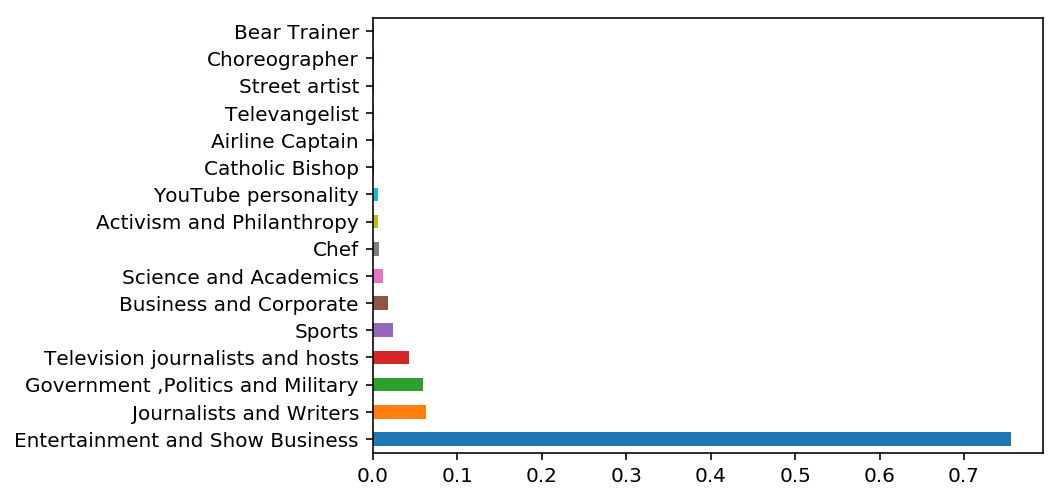

In [22]:
df['occupation'].value_counts().plot(kind='barh')

It's very obvious that we have 75% of the guests from Entertainment and show business. This sits well with the results we got from the Tableau analysis which is ecpressed in the blog.


**2.What is the age distribution among these guests?** 

In [27]:
age = df[df['age'] >0]

In [28]:
age.describe()

,age
count,984.000000
mean,48.400407
std,13.565269
min,10.000000
25%,38.000000
50%,47.000000
75%,57.000000
max,94.000000


Out of the 984 guests whose age is mentioned the average age is 48.4 and 75% of the guests were of less than 57 years old. Also if you look at the standard deviation which is 13 you will get a fair idea about the distribution of the age.

**3.Are there significant gap in gender of total number of guests?**  

In [42]:

gender = df[df['gender'].isin(['M', 'F']) ]

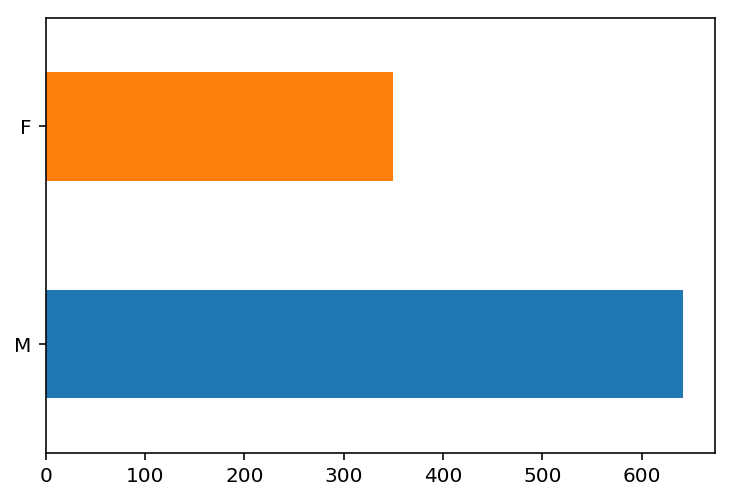

In [46]:
gender['gender'].value_counts().plot(kind='barh')

From the above figures it is very clear that there is a significant difference between number of female guests and male guests.Infact the number of female guests is around 350 and the number of male guests is 649

For detailed analysis please see https://towardsdatascience.com/these-5-data-visualizations-will-make-you-see-late-show-with-stephen-colbert-in-a-new-light-34e03cc2541d